# Reinforcement Learning - Homework 2
Ananya Gandhi, UNI: ag4348

## Written Homework


### Question 1: can chess be modeled as a Markov Decision Process
Yes, chess can be modeled as a Markov Decision Process. If the opponent is considered to be the "environment", then we can model chess as a Markov Decision Process with probablistic/stochastic transitions, rather than deterministic transitions. Each state of the Markov Decision Process represents the configuration of the chess board at that point in time, and while the agent can select the action/move it desires, the next state has a probablistic element in that the opponent's action cannot be predicted. Thus, state transitions are non-deterministic, and for every state-action pair, the transition probability depends on the opponent's transition function: $\mathbb{P}(s' | s, a)$. We attempt to learn the opponent's probability distribution function for selecting their action in order to predict the next state and determine the probability of each transition. 

Additionally, discounted rewards can be used to determine the optimal policy; the end states have a reward associated if the agent wins (or a reward of 0 if the agent ties, and a reward of -1 if the agent loses). Then, at every state, the value of that state is dependent on the number of paths between the state and a winning configuration, as well as the number of steps until victory in order to prioritize current rewards over later rewards. This allows the agent to learn which policy will maximize the probability of its victory. 

A pure greedy policy, for example, would involve selecting the action $a(s)$ at each step by finding which available action will maximize the expected value of the next state. 

$$
  a(s) = argmax_{a \in A} \left( V(s') \cdot \mathbb{P}(s' | s, a) \right)
$$

Other policies that allow for exploration would also allow the agent to explore more tactics in order to better learn and predict what choices the opponent may make. 

Although it is possible to model chess using a Markov Decision Process, it is important to recognize the extremely high branching factor and high depth of game trees that model a game of chess. The number of possible chess board configurations is estimated to be approximately $10^{50}$, thus truly implementing a Markov Decision Process to simulate chess would be computationally intractable. 

### Question 2: given a policy $\pi$ that maps each state in an MDP to a probability distribution of actions

2a) $v_{\pi}$ in terms of $q_{\pi}$

$$
    v_{\pi} (s) = \sum_a \pi(a | s) \sum_{s', r} p(s', r | s, a) \Bigl[ r + \gamma v_{\pi}(s') \Bigr]  \\
    q_{\pi} (s, a) = \sum_{s', r} p(s', r | s, a) \Bigl[ r + \gamma v_{\pi}(s') \Bigr]  \\
    v_{\pi} (s) = \sum_{a} \pi(a | s) q_{\pi}(s, a) 
$$

2b) $q_{\pi}$ in terms of $v_{\pi}$

$$
    q_{\pi} (s, a) = \sum_{s', r} p(s', r | s, a) \Bigl[r + \gamma v_{\pi} (s') \Bigr]
$$

2c) $v_{*}$ in terms of $q_{*}$

$$
    v_{*} (s) = \max_{a}  q_{\pi}(s, a) 
$$

2d) $q_{*}$ in terms of $v_{*}$

$$
    q_{*} (s, a) = \sum_{s', r} p(s', r | s, a) \Bigl[r + \gamma \max_{a'} q_{*} (s', a') \Bigr] \\
    v_{*} (s') = \max_{a'}  q_{\pi}(s', a') \\
    q_{*} (s, a) = \sum_{s', r} p(s', r | s, a) \Bigl[r + \gamma v_{*} (s') \Bigr]
$$


### Question 3: gambler MDP problem, optimal action at states 25, 50, 75

In this problem, the probability of winning in any given round is $p_h = 0.4$. Thus, because the coin is biased against the agent, the goal is to reach $100 in the fewest moves possible in order to avoid losing money. Making lots of small bets is not in the gambler's favor, as the gambler would likely lose money. From state 50, there is a 0.4 probability of reaching the end state in a single step and winning. 

**State 50**

Betting 50 at state 50 is the optimal action because the potential for receiving a reward in the next state outweighs the risk of losing everything. Additionally, the value of this action $\gamma p_h$ outweighs the value of betting an amount less than 50, because the value of that action depends on the discounted values of other states, which means that the reward would be postponed and discounted several times. Considering that the success probability $p_h = 0.4$, it is optimal to take a risk in this step with 0.4 probability of winning it all, rather than make a series of smaller bets and continually face the risk of losing with 0.6 probability. 

**State 75**

At state 75, the optimal action is to bet 25 in order to optimize the expected reward. If 25 is bet and the agent wins (with probability p), then the agent receives a reward in the next state. If the agent loses, the agent returns to state 50, at which stage the agent again has 0.4 probability of winning. The value of betting 25 is simply $\gamma \Bigl( p_hV(100) + (1 - p_h)V(50) \Bigr)$. 

On the other hand, if the agent chooses to bet an amount $b$ that is less than 25, the agent is taking a risk by playing a longer game where the odds are against the player, in favor of a potential reward at the end. The value of betting less than 25 becomes $\gamma \Bigl( p_h V(75 + b) + (1 - p_h)V(75 - b) \Bigr)$. 

As a result, the optimal action is to bet 25 because of the potential of receiving a reward immediately in the next state, or being able to win with 0.4 probability if the agent returns to state 50. 

**State 25**

Finally, betting 25 at state 25 is the optimal action because of the probability of winning in 2 rounds, by jumping to 50 and then 100. The high value of state 50 outweighs the risk of losing everything, and also outweighs the value of an action that would risk less but require more rounds of playing and involve a more heavily discounted reward.

Betting 25 would potentially bring the agent significantly closer to winning the game (could win in 2 steps) which allows the agent to subvert the risk of playing a longer game with the stakes against the player (0.4 win probability). 

### Question 4
4a) Base case: $i = j$, so we have
$$
    d_{i, i}^* = \min_l (d_{i, l}^* + d_{l, i}) \\
    d_{i, i}^* = d_{i, i}^*  = 0
$$
The Bellman-like optimality relationship is correct for the base case, because the distance between a vertex and itself is 0, and this distance in minimum. 

Inductive Hypothesis: Assume that the relationship $d_{i, j}^* = \min_l (d_{i, l}^* + d_{l, j}) $ holds for $1 \leq i, j, l \leq n$ and that this relationship is true for all $n$ vertices in a graph G. 

Inductive Step: Add a vertex $n + 1$ to the graph. We have that
$$
    D_{i, n + 1} = \begin{cases} 
    0 & \text{if i = n + 1} \\
    d(v_i, v_j) & \text{if there is an edge from $v_i$ to $n + 1$} \\
    \infty & \text{if there is no edge from $v_i$ to $n + 1$}
    \end{cases}
$$

To show that $d_{i, n + 1}^* = \min_l (d_{i, l}^* + d_{l, n + 1}) $ holds for $1 \leq i, j, l \leq n + 1$, assume that there exists some distance $d_x$ such that:

$$
    d_x = \min (d_{i, n + 1}) < d_{i, n + 1}^* 
$$

Let the set $N$ represent the set of vertices in the initial graph that connect to vertex $n + 1$. 

$$
    d_x < d_{i, n + 1}^* = \min_{l \in N} (d_{i, l}^* + d_{l, n + 1}) \\
    d_x < \min_{l \in N} (d_{i, l}^* + d_{l, n + 1}) 
$$

Assume that $n$ is final vertex along the shortest path to vertex $n + 1$, meaning that it is directly connected to vertex $n + 1$. Then, we have
$$
    d_x = d_{i, n}^* + d_{n, n+1} < \min_{l \in N} (d_{i, l}^* + d_{l, n + 1}) \\
    d_{i, n}^*  < d_{i, n}^*
$$

Because $n$ is the final vertex along the shortest path, we know that the distance $d_{n, n+1}$ exists on both sides of the inequality, and we conclude that the path $d_x$ must be optimal at some other point. However, this leads us to a contradiction of the Inductive Hypothesis, as we know by definition that $d_{i, n}^*$ is the minimum distance between vertices $i$ and $n$, and thus $d_{i, n}^*  < d_{i, n}^*$ is not true because the two distances are equal. 

Therefore, through induction, we have shown that the Bellman-like optimality equation holds. 

The memoryless property of dynamic programming leads us to this relation; because dynamic programming ensures optimality without requiring us to remember the entire history of a problem, we can ensure that the distance up to a specific vertex is minimum without storing the entire path or history up until that point. Additionally, this would not be possible without the discrete and finite properties of dynamic programming that ensure that the algorithm does not get stuck in self-loops or infinite recursion. 

4b) What are the $D^{(0)}$ and $D^{(1)}$ matrices?

$$
    D^{(0)} = \begin{bmatrix}
    0 & \infty  & \dots & \infty \\
    \infty & 0  & \dots & \infty\\
    \vdots & \vdots & \ddots & \vdots \\   
    \infty & \infty & \dots & 0
    \end{bmatrix}
$$
$D^{(0)}$ is the $n \times n$ matrix with 0 on the diagonal and $\infty$ in every other entry. 

$$
    D^{(1)} = \begin{cases}
    0 & i = j \\
    d(v_i, v_j) & i \rightarrow j \\
    \infty & i \not\rightarrow j
    \end{cases}
$$

$D^{(1)}$ is the $n \times n$ matrix with 0 on the diagonal, $d(v_i, v_j)$ if there is an edge leading from $i$ to $j$, and $\infty$ if there is no edge leading from $i$ to $j$. $D^{(1)}$ is the same as the matrix $D_{i, j}$ defined by the problem. 

4c) The Bellman optimality relationship is:

$$
    d_{i,j} ^* = \min_l (d_{i, l} ^* + d_{l,j} ) 
$$

for $1 \leq i, j, l \leq n$. 

Considering that the $\star$ operator computes the min-sum product of two matrices, we can rewrite the Bellman optimality equation as $D^* = D^* \star D$. 
This allows us to compute the matrix by taking the minimum of the sum over all intermediate vertices $l$ (by taking the minimum over the dot product that iterates over all possible vertices by going over all rows and columns in the matrix). 

#### Question 4D

In [118]:
# given a matrix of distances D, compute d star
import numpy as np

def dk_star(D, k):
  final_matrix = np.copy(D)
  
  for i in range(k):
      final_matrix = d_star(final_matrix, D)
  
  return final_matrix


def d_star(X, Y):
  result = np.copy(X)
  for i in range(len(X)):
      for j in range(len(Y[0])):
          for k in range(len(Y)):
              result[i,j] = min(result[i,j], X[i,k] + Y[k,j])
  
  return result

matrix = np.array([[0, 5, np.inf, 10], 
                     [np.inf, 0, 3, np.inf], 
                     [np.inf, np.inf, 0, 1], 
                     [np.inf, np.inf, np.inf, 0]])

dk_star(matrix, 3)

array([[ 0.,  5.,  8.,  9.],
       [inf,  0.,  3.,  4.],
       [inf, inf,  0.,  1.],
       [inf, inf, inf,  0.]])

In [119]:
# compare this to computing the matrix D^(k) which is the matrix where the
# (i, j)th entry represents the shortest distance from v_i to v_j in k steps

def d_k(D, k):
    dist = np.copy(D)
    
    for n in range(k):
        for i in range(len(D)):
            for j in range(len(D)):  
                dist[i,j] = min(dist[i,j], dist[i,n] + dist[n, j])
    
    return dist

def d_optimal(D):
    dist = np.copy(D)
    
    for n in range(len(D)):
        for i in range(len(D)):
            for j in range(len(D)):  
                dist[i,j] = min(dist[i,j], dist[i,n] + dist[n, j])
    
    return dist

matrix = np.array([[0, 5, np.inf, 10], 
                     [np.inf, 0, 3, np.inf], 
                     [np.inf, np.inf, 0, 1], 
                     [np.inf, np.inf, np.inf, 0]])

d_k(matrix, 3)

array([[ 0.,  5.,  8.,  9.],
       [inf,  0.,  3.,  4.],
       [inf, inf,  0.,  1.],
       [inf, inf, inf,  0.]])

We know that $D^{\star k} = D^{(k)}$ which can be shown by applying the two algorithms above to the same matrix D. We know that $D^{(n - 1)} = D^*$, which means that the iterative algorithm runs in $\mathcal{O}(N^{3})$ time, where $N$ is the number of vertices. 

Additionally, the two algorithms are essentially equivalent because for every pair of 2 vertices in the graph, the algorithms compute the same minimum distance using the following formula:


```
result[i,j] = min(result[i,j], X[i,k] + Y[k,j]) 
```

where i, j are two vertices and k is some intermediate vertex between them. 



#### Question 4e

The predecessor matrix $P^{(k)}$ can be defined in a similar way as the matrix $D$. The predecessor matrix consists of the shortest path from a matrix $i$ to a matrix $j$, but consisting of the vertex $l$ that immediately precedes $j$ in the shortest path. The following algorithm shows that we can compute $P^{(k)}$ while also computing $D^{(k)}$:



In [146]:
def p_k(D, k):
    p = np.ndarray(D.shape)
    for a in range(len(D)):
      for b in range(len(D[0])):
        if a == b or D[a,b] == np.inf:
          p[a,b] = None
        
        else:
          p[a,b] = a
    
    dist = np.copy(D)
    
    for n in range(k):
        for i in range(len(D)):
            for j in range(len(D)):  
                old_dist = dist[i,j]

                dist[i,j] = min(dist[i,j], dist[i,n] + dist[n, j])

                if old_dist != dist[i,j]:
                  p[i,j] = p[n,j]
    
    print("Predecessor Matrix:\n", p)
    print("D Matrix:\n", D)
    return p, dist

matrix = np.array([[0, np.inf, 3, np.inf, np.inf],
                   [4, 0, np.inf, 1, 2], 
                   [3, 8, 0, 2, 6],
                   [np.inf, 1, np.inf, 0, 4], 
                   [np.inf, 1, 6, 4, 0]])

p_k(matrix, 5)

Predecessor Matrix:
 [[nan  3.  0.  2.  1.]
 [ 1. nan  0.  1.  1.]
 [ 2.  3. nan  2.  1.]
 [ 1.  3.  0. nan  1.]
 [ 1.  4.  4.  1. nan]]
D Matrix:
 [[ 0. inf  3. inf inf]
 [ 4.  0. inf  1.  2.]
 [ 3.  8.  0.  2.  6.]
 [inf  1. inf  0.  4.]
 [inf  1.  6.  4.  0.]]


(array([[nan,  3.,  0.,  2.,  1.],
        [ 1., nan,  0.,  1.,  1.],
        [ 2.,  3., nan,  2.,  1.],
        [ 1.,  3.,  0., nan,  1.],
        [ 1.,  4.,  4.,  1., nan]]), array([[0., 6., 3., 5., 8.],
        [4., 0., 7., 1., 2.],
        [3., 3., 0., 2., 5.],
        [5., 1., 8., 0., 3.],
        [5., 1., 6., 2., 0.]]))

Note, to find the optimal $P^*$ you can simply call the function with $k = n$ where $n$ is the number of vertices. 

We can obtain the sequence of vertices that are required to traverse from $v_i$ to $v_j$ by looking at the entry $P^* (i,j)$. This tells us the predecessor of vertex $j$ in the sequence. Let the predecessor of vertex $j$ be some vertex $l$. Then, we look at the entry $P^*(i, l)$ to find the predecessor of $l$ in the sequence from $i$ to $l$. We repeat this method of looking at the predecessor in the $P^*$ matrix until we return to the initial vertex, $i$.

## Programming Homework

### Question 5

In [172]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
from tqdm import trange
from scipy.stats import poisson
from scipy import stats

Question 5A: 

In [161]:
class skishop_5A:

    def __init__(self, averages):
        self.averages = averages
        self.gamma = 0.9
        self.cost = 500
        self.price = 700
        self.finalsale = 300
        self.currentstate = ("sep", 0)
        self.initial = ("sep", 0)
        self.max_stock = 100
        self.state_values = np.zeros((len(averages), self.max_stock + 1))

    def reset(self):
        self.currentstate = self.initial
        self.state_values = np.zeros((len(averages), self.max_stock + 1))

    def act(self):

        # iterate backwards through months
        for i in range(len(averages)):
            index = (-1 * i) - 1
            month = averages[index][0]
            lambda_M = self.averages[index][1]

            # if dealing with march
            if month == self.averages[-1][0]: 
                for stock in range(self.max_stock + 1):
                    self.state_values[-1, stock] = stock * self.finalsale

            else:
                for stock in range(self.max_stock + 1):
                    # determine order value using suboptimal policy
                    if 0.5 * lambda_M < 5:
                        order = min(random.randint(int(0.5 * lambda_M), 5), self.max_stock - stock)
                
                    else:
                        order = min(random.randint(5, int(0.5 * lambda_M)), self.max_stock - stock)

                    state_value = 0

                    for demand in range(self.max_stock + 1):
                        d = min(demand, stock + order)
                        probability = poisson.pmf(k = demand, mu = lambda_M)
                        
                        # use tail CDF for demand = 100 to represent p(demand >= 100)
                        if demand == self.max_stock:
                            probability = 1 - poisson.cdf(k = demand, mu = lambda_M)
                        
                        reward = (self.price * d) - (self.cost * order)
                        state_value += probability * (reward + self.gamma * self.state_values[index + 1, stock + order - d])
                    
                    self.state_values[index, stock] = state_value
          
        # return value for sept, 0
        return self.state_values[0][0]

def simulate(runs, averages, skishop):

    values = np.zeros(runs)

    for i in trange(runs):
        skishop.reset()
        val = skishop.act()
        values[i] = val

    mean_value = values.mean()
    return mean_value

averages = [("sep", 0), ("oct", 20), ("nov", 40), ("dec", 50), ("jan", 35), ("feb", 25), ("mar", 5), ("mar+", 0)]
skishop = skishop_5A(averages)
print(skishop.act())

7348.3018993011265


Question 5B:

100%|██████████| 8/8 [05:21<00:00, 40.23s/it]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.
   6.  5.  4.  3.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29. 28.
  27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.
   9.  8.  7.  6. 

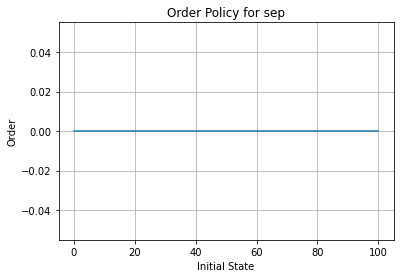

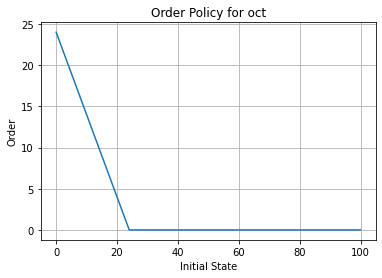

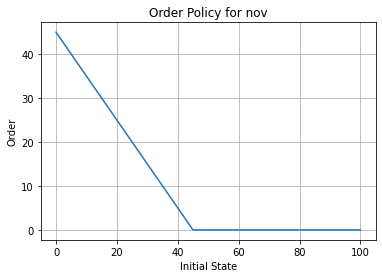

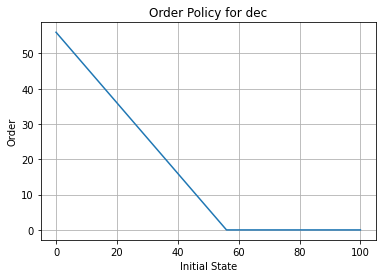

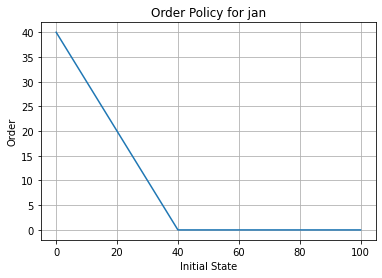

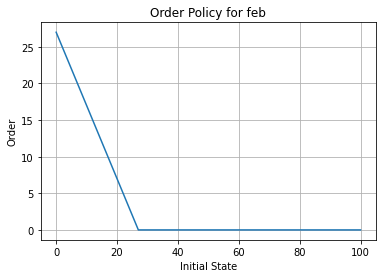

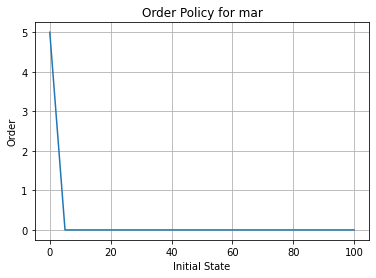

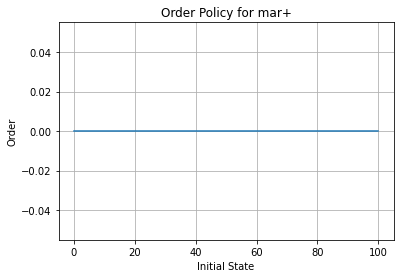

In [187]:
### CODE FOR 5B CHANGING THE SAMPLING TO PROBABILITIES
class skishop_pls:

    def __init__(self, averages):
        self.averages = averages
        self.gamma = 0.9
        self.cost = 500
        self.price = 700
        self.finalsale = 300
        self.currentstate = ("sep", 0)
        self.initial = ("sep", 0)
        self.max_stock = 100
        self.optimal_orders = np.zeros((len(averages), self.max_stock + 1))
        self.state_values = np.zeros((len(averages), self.max_stock + 1))

    def reset(self):
        self.currentstate = self.initial
        self.state_values = np.zeros((len(averages), self.max_stock + 1))

    def act(self):
        
        # recurse backwards
        for i in trange(len(averages)):
            index = (-1 * i) - 1
            month = averages[index][0]
            lambda_M = self.averages[index][1]

            # if dealing with march
            if month == self.averages[-1][0]: 
                for stock in range(self.max_stock + 1):
                    self.state_values[-1, stock] = stock * self.finalsale 
            
            else:
                for stock in range(self.max_stock + 1):
                    # determine order using max function
                    max_value = 0

                    for order in range(self.max_stock - stock + 1):

                        state_value = 0

                        for demand in range(self.max_stock + 1):
                            d = min(demand, stock + order)
                            probability = poisson.pmf(k = demand, mu = lambda_M)
                            
                            if demand == self.max_stock:
                                probability = 1 - poisson.cdf(k = demand, mu = lambda_M)
                            
                            reward = (self.price * d) - (self.cost * order)
                            state_value += probability * (reward + self.gamma * self.state_values[index + 1, stock + order - d])

                        if state_value > max_value:
                            max_value = state_value
                            self.optimal_orders[index, stock] = order
                        
                    self.state_values[index, stock] = max_value
          
        return self.optimal_orders
            
averages = [("sep", 0), ("oct", 20), ("nov", 40), ("dec", 50), ("jan", 35), ("feb", 25), ("mar", 5), ("mar+", 0)]
skishop = skishop_pls(averages)

optimal_orders = skishop.act()

# the value of september under optimal policy is
print(skishop.state_values[0][0])

# plotting
x = [i for i in range(100 + 1)]
for i in range(len(averages)):
  month = averages[i][0]
  order_policy = optimal_orders[i]
  plt.plot(x, order_policy)
  plt.title("Order Policy for " + month)
  plt.xlabel("Initial State")
  plt.ylabel("Order")
  plt.grid()
  plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 24724.30it/s]


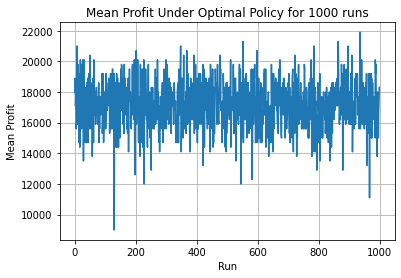

Mean Profit:  17167.5
Standard Deviation:  1576.1846681490426


In [184]:
class skishop_optimal:

    def __init__(self, averages, optimal_policy):
        self.averages = averages
        self.gamma = 0.9
        self.cost = 500
        self.price = 700
        self.finalsale = 300
        self.currentstate = ("sep", 0)
        self.initial = ("sep", 0)
        self.max_stock = 100
        self.optimal_orders = np.zeros((len(self.averages), len(self.averages[0])))
        self.optimal_policy = optimal_policy

    def reset(self):
        self.currentstate = self.initial

    def act(self):

        stock = self.currentstate[1]
        profit = 0
        
        for i in range(len(self.averages)):

          month = self.averages[i][0]
          lambda_M = self.averages[i][1]

          order = int(self.optimal_policy[i, stock])
          demand = min(np.random.poisson(lam = lambda_M), stock + order)
          profit = (self.price * demand) - (self.cost * order)

          if i < len(self.averages) - 1:
            stock = stock + order - demand
          
          else: # last month, march
            profit += (stock + order - demand) * self.finalsale
        
        return profit

def simulate_5C(runs, averages, skishop):

    profits = np.zeros(runs)

    for i in trange(runs):
        skishop.reset()
        profit = skishop.act()
        profits[i] = profit

    return profits
            
averages = [("sep", 0), ("oct", 20), ("nov", 40), ("dec", 50), ("jan", 35), ("feb", 25), ("mar", 5), ("mar+", 0)]
skishop = skishop_optimal(averages, optimal_policy=optimal_orders)
profits = simulate_5C(1000, averages, skishop)

mean_profits = profits.mean()
stdev = stats.tstd(profits)

plt.plot(profits)
plt.xlabel("Run")
plt.ylabel("Mean Profit")
plt.title("Mean Profit Under Optimal Policy for 1000 runs")
plt.axis()
plt.grid()
plt.show()

print("Mean Profit: ", mean_profits)
print("Standard Deviation: ", stdev)

The mean profit using this optimal strategy is approximately 17,000. Comparatively, the optimal state value of (Sep, 0) predicted by the algorithm is approximately 23,000. The value under the optimal policy is lower, but this is expected because demand is still random so optimal returns will not always occur. 